In [8]:
import pandas as pd

# Replace 'your_file.xlsx' with the path to your Excel file
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\European_Bank.csv")

# Display the first 5 rows
df.head()

,Year,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2025,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2025,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2025,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,2025,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,2025,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.shape

(10000, 14)

In [10]:
# Drop columns safely (strip spaces if needed)
df = df.drop(columns=["CustomerId", "Surname"], errors="ignore")


In [11]:
df.head()

,Year,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2025,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2025,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2025,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,2025,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,2025,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.shape

(10000, 12)

In [13]:
# handling missing values
df.isnull().sum()

Year               0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
df.describe()

,Year,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,2025.0,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,0.0,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,2025.0,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2025.0,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,2025.0,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,2025.0,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,2025.0,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:

# Define columns to check for outliers
outlier_cols = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

# Apply IQR method
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Check cleaned data
print(df.shape)


(9626, 12)


In [16]:
# removingg duplicates
df.drop_duplicates()

,Year,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2025,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2025,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2025,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,2025,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,2025,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2025,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,2025,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,2025,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,2025,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [19]:
df.shape

(9626, 12)

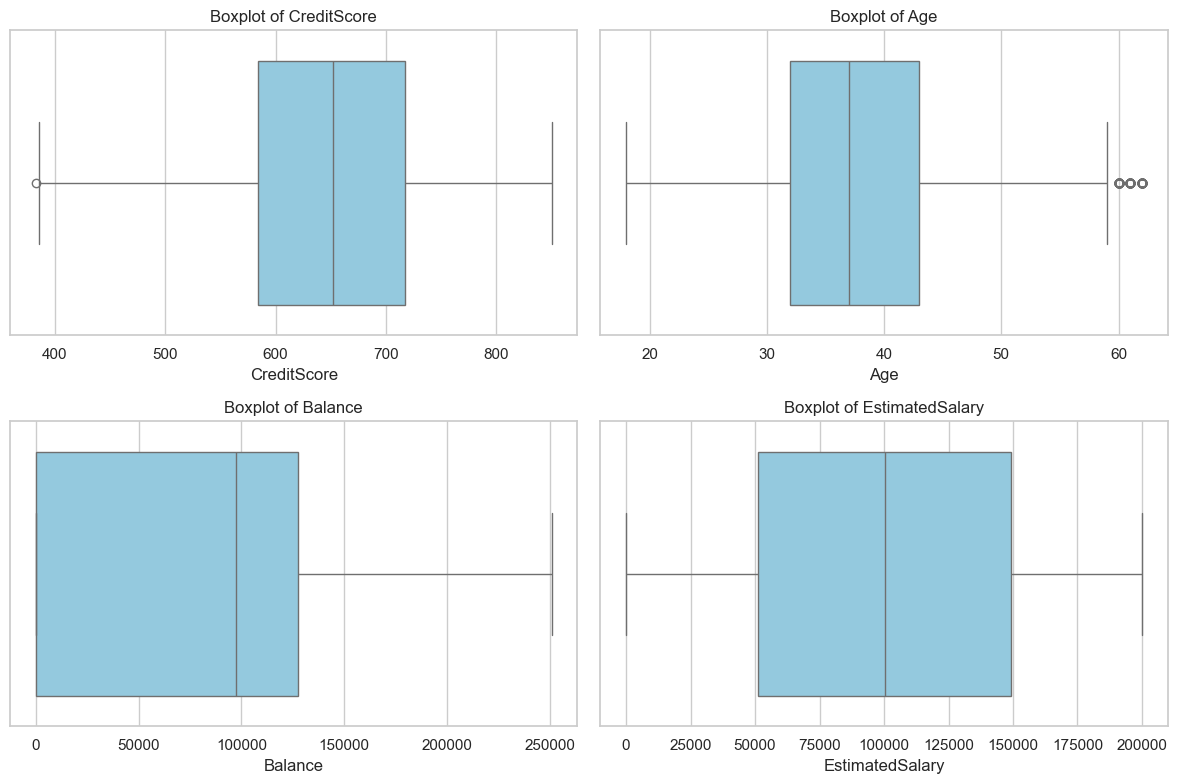

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns

# Select columns to visualize
cols_to_plot = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

# Set plot style
sns.set(style="whitegrid")

# Create boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9626 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             9626 non-null   int64  
 1   CreditScore      9626 non-null   int64  
 2   Geography        9626 non-null   object 
 3   Gender           9626 non-null   object 
 4   Age              9626 non-null   int64  
 5   Tenure           9626 non-null   int64  
 6   Balance          9626 non-null   float64
 7   NumOfProducts    9626 non-null   int64  
 8   HasCrCard        9626 non-null   int64  
 9   IsActiveMember   9626 non-null   int64  
 10  EstimatedSalary  9626 non-null   float64
 11  Exited           9626 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 977.6+ KB


In [25]:
from sqlalchemy import create_engine

#connect to postgreSQL
username = "postgres"
password = "12345"
host = "localhost"
port = "5432"
database = "postgres"
engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

#load database into postgreSQL
table_name = "Bank"
df.to_sql(table_name, engine, if_exists="replace", index=False)
print(f"data successfuly loaded into table '{table_name}' in database '{database}'.")


data successfuly loaded into table 'Bank' in database 'postgres'.
